Files already downloaded and verified


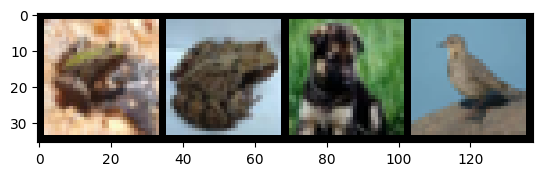

In [15]:
from random import sample
from torchvision import transforms as T
import matplotlib.pyplot as plt
import numpy as np
import torchvision

import torch
from src.datasets import CIFAR10


CIFAR10.transform = T.Compose(
        [
            T.ToTensor(),
        ]
)
dataloader = CIFAR10.load_test_cifar_10()
sample_images, sample_labels = next(iter(dataloader))

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
imshow(torchvision.utils.make_grid(sample_images))


In [32]:
def transforming(transform, sample_images):
    transform_images = []
    for sample_image in sample_images:
        transform_images.append(transform(sample_image))
    transform_images = torch.stack(transform_images, dim=0)
    return transform_images

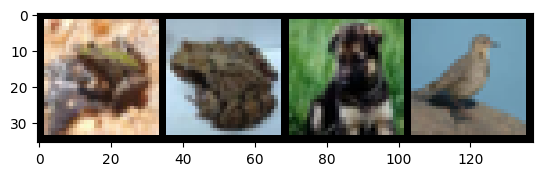

In [35]:
# Transform Random HorizontalFlip

transform = T.Compose([
        T.ToPILImage(),
        T.RandomHorizontalFlip(p=1),
        T.ToTensor(),
    ]
)

transform_images = transforming(transform, sample_images)

imshow(torchvision.utils.make_grid(transform_images))

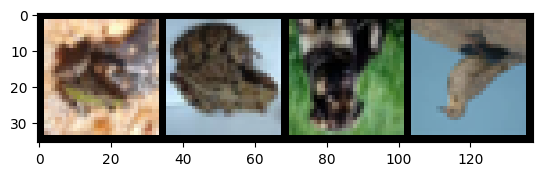

In [39]:
# Transform Random VerticalFlip

transform = T.Compose([
        T.ToPILImage(),
        T.RandomVerticalFlip(p=1),
        T.ToTensor(),
    ]
)

transform_images = transforming(transform, sample_images)

imshow(torchvision.utils.make_grid(transform_images))

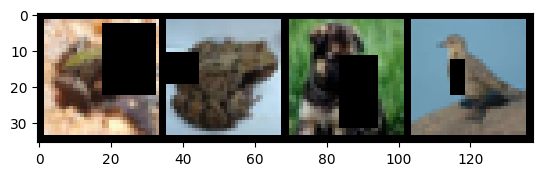

In [42]:
# Transform Random Erasing

transform = T.Compose([
        T.RandomErasing(p=1),
    ]
)

transform_images = transforming(transform, sample_images)

imshow(torchvision.utils.make_grid(transform_images))

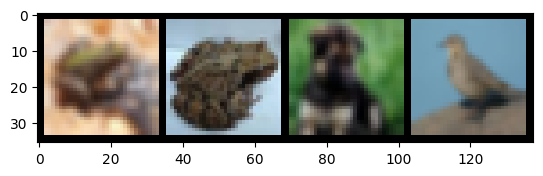

In [46]:
# Transform Random GaussianBlur

transform = T.Compose([
    T.GaussianBlur(3)
])

transform_images = transforming(transform, sample_images)

imshow(torchvision.utils.make_grid(transform_images))
print(CIFAR10.classes)